[Ссылка на презентацию по проекту мобильные приложения](https://drive.google.com/file/d/12ngUd2Tsg4jnDPugP14kK70z5zr4GFal/view?usp=drive_link)

**Название проекта:** сегментация пользователей мобильного приложения "Ненужные вещи"

**Цель исследования:** выделение групп пользователей на основе их поведения в мобильном приложении "Ненужные вещи"
        
**Данные для анализа:** информация о действиях пользователей приложения в период с  7 октября 2019 года по 3 ноября 2019 года


Для достижения поставленных целей исследование разделено на следующие этапы:
1. Предобработка данных
<br>
    1.1. Загрузка данных, объединение баз данных, обработка названий полей и их типов данных
<br>
    1.2. Оценка корректности заполненности базы, наличия пропусков/дубликатов и явных аномалий
<br>
    1.3. Анализ уникальных значений в базе, поиск скрытых дубликатов  
<br>
<br>
2. Исследовательский анализ 
<br>
    2.1. Расчет индекса удержания пользователей - retention rate
<br>
    2.2. Подсчет времени, проведенного пользователем в приложении, выделение пользовательских сессий
<br>
    2.2.1 Выделение пользовательских сессий и подсчет времени, проведенного в приложении
<br>
    2.2.2 Аномалии и выбросы в продолжительности сессий
<br>
    2.3. Определение частоты действий пользователя
<br>
    2.4. Расчет конверсии в целевое действие (просмотр контакта)
<br>
<br>
3. Сегментация пользователей на основе проведенного исследовательского анализа
<br>
    3.1. Возможные варианты сегментации пользователей, возникшие по итогам исследовательского анализа данных
<br>
    3.2. Использованный способ сегментации пользователей: общие принципы, обоснование выбора, детальное описание сегментов
<br>  
    3.3. Расчет индекса удержания пользователей в разрезе выбранной сегментации
<br>
    3.3. Расчет конверсии в целевое действие (просмотр контакта) в разрезе выбранной сегментации
<br>
<br>
4. Формулировка и проверка статистических гипотез
<br>
    4.1. Гипотеза 1: конверсия в просмотры контактов разная у пользователей, установивших приложение через ссылку из yandex и через google 
<br>    
    4.2. Гипотеза 2:  конверсия в просмотры контактов разная у пользователей из разных групп проведенной сегментации 
<br>
<br>
5. Выводы и рекомендации

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import time
import math as mth
from scipy import stats as st

#  1. Предобработка данных

## 1.1. Загрузка данных, объединение баз данных, обработка названий полей и их типов данных

In [2]:
try:
    mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
     # альтернативный путь к данным для работы с других устройств 
except:   
    mobile_dataset = pd.read_csv('mobile_dataset.csv')  # загружаем локальный файл с данными пользовательских сессий

In [3]:
mobile_dataset

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


In [4]:
try:
    mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')   
    # альтернативный путь к данным для работы с других устройств    
except:
    mobile_sourсes = pd.read_csv('mobile_sourсes.csv')  # загружаем локальный файл с источниками установки приложений

In [5]:
mobile_sourсes

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex


Загружаем базы и смотрим на полученные данные:

In [6]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [7]:
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


В базах мы видим информацию о произведенных действиях пользователя в приложении и источник, через который пользователь установил приложение. У обеих баз общий идентификатор клиентов. Создадим общий датасет data, в который смержим информацию из двух файлов. Для этого сразу переименуем названия столбцов.

In [8]:
data = mobile_dataset 
data.columns = ['event_time', 'event_name', 'user_id']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_time  74197 non-null  object
 1   event_name  74197 non-null  object
 2   user_id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [9]:
mobile_sourсes.columns = ['user_id', 'channel']  # переименовываем столбцы и в файле с источниками установки
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  4293 non-null   object
 1   channel  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [10]:
# объединяем базы по user_id   
data = data.merge(mobile_sourсes, on=['user_id'], how='left')

**Вывод 1.1:** загружены базы для анализа, объединенные по user_id, колонки переименованы в удобные для анализа.

##    1.2. Оценка корректности заполненности базы, наличия пропусков/дубликатов и явных аномалий

Для первичного анализа полученного общего датасета применим функцию первичной обработки

In [11]:
# определим функцию, проверяющую основные параментры датасета

def initial_analysis(file):    
    print('Общая информация о датасете:')
    display(file.info())
    print ('-----------------------------')
    print('Первые 5 строчек датасета:')
    display(file.head(5))
    print ('-----------------------------')
    print('Количество пропусков в датасете:')    
    display(data.isna().sum())
    print ('-----------------------------')
    print('Количество явных дубликатов в датасете:')    
    display(data.duplicated().sum())

In [12]:
initial_analysis(data) # и применим к датасету 

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_time  74197 non-null  object
 1   event_name  74197 non-null  object
 2   user_id     74197 non-null  object
 3   channel     74197 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


None

-----------------------------
Первые 5 строчек датасета:


,event_time,event_name,user_id,channel
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex


-----------------------------
Количество пропусков в датасете:


event_time    0
event_name    0
user_id       0
channel       0
dtype: int64

-----------------------------
Количество явных дубликатов в датасете:


0

Данные в поле event_time необходимо перевести в формат datetime. Для удобства дальнейшего анализа сразу же создадим поле date_event,  куда вынесем дату события (без точного времени)

In [13]:
data['event_date'] = data['event_time'].str.split(' ', expand = True)[0]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_time  74197 non-null  object
 1   event_name  74197 non-null  object
 2   user_id     74197 non-null  object
 3   channel     74197 non-null  object
 4   event_date  74197 non-null  object
dtypes: object(5)
memory usage: 3.4+ MB


In [15]:
data.sample(10)

,event_time,event_name,user_id,channel,event_date
44256,2019-10-24 13:22:36.095149,contacts_show,a3f24168-018f-49ee-8e1f-cc9c528d5aa4,google,2019-10-24
62260,2019-10-30 14:15:33.174461,search_1,25069cad-0d00-48cb-a627-0871a877307e,google,2019-10-30
61948,2019-10-30 12:42:37.506721,advert_open,a5886b3e-6ed1-4c47-ac28-754ff8f429ce,yandex,2019-10-30
43567,2019-10-24 09:45:44.781763,photos_show,97d66991-e416-48be-a26d-27f6094d268e,yandex,2019-10-24
21830,2019-10-16 08:55:16.148890,tips_show,4328851e-3876-4bfd-9e4f-c5c348f2ba7b,yandex,2019-10-16
41880,2019-10-23 17:06:43.974723,advert_open,543199e1-9439-4ad5-9752-d41f8925d446,yandex,2019-10-23
60264,2019-10-29 19:31:08.082740,map,07d0c16e-0db4-4ba2-b9f6-244d3f17b5fb,google,2019-10-29
9076,2019-10-10 20:17:39.145465,photos_show,27a94447-2ca7-473f-b415-6bfeb48d131a,other,2019-10-10
27208,2019-10-18 08:34:40.448127,tips_show,8208b9fd-1a45-4e49-a6a5-2600dadd2958,yandex,2019-10-18
44314,2019-10-24 13:50:24.180818,photos_show,269e6d1d-5300-4966-8289-77274c30bd9c,google,2019-10-24


In [16]:
data['event_time']= pd.to_datetime(data['event_time'])  # переводим в формат datetime
data['event_date'] = pd.to_datetime(data['event_date'])

In [17]:
data.info()
data.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   channel     74197 non-null  object        
 4   event_date  74197 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 3.4+ MB


,event_time,event_name,user_id,channel,event_date
34755,2019-10-21 11:54:26.896118,tips_show,881152bf-c49d-4eed-923e-3c424b1a327f,other,2019-10-21
45095,2019-10-24 17:28:33.939550,photos_show,62a5375a-eb94-4ed2-90ef-3d79d8e0c359,other,2019-10-24
18483,2019-10-14 21:45:32.963086,photos_show,81ce7cc8-ee16-42db-b5f0-6aa086426bd4,yandex,2019-10-14
62545,2019-10-30 15:37:33.619965,tips_show,5e35b8bf-1120-4938-9b1b-e90911b045b0,other,2019-10-30
22881,2019-10-16 14:36:26.050125,search_5,8e6947e2-9c8a-47f0-bbbe-b7eef1be742f,other,2019-10-16
17672,2019-10-14 16:44:55.532635,photos_show,24ac2305-db66-43bd-805d-3901bc994e85,yandex,2019-10-14
42829,2019-10-23 21:41:30.104139,map,e5773d92-9b5e-437d-bd47-c16ed5cb87b0,other,2019-10-23
19880,2019-10-15 14:31:48.113996,tips_show,fdd8c58d-04ca-4125-9c34-e93fb79add17,other,2019-10-15
69312,2019-11-01 22:13:24.789373,tips_show,7a4806d3-b727-43f7-9edc-d5068869d95d,yandex,2019-11-01
24865,2019-10-17 10:45:53.651708,tips_show,7e4ba7cd-1600-4fae-ad59-3524a51bed47,yandex,2019-10-17


In [18]:
data.describe() # посмотрим описание базы

/tmp/ipykernel_269/1514657936.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe() # посмотрим описание базы
/tmp/ipykernel_269/1514657936.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe() # посмотрим описание базы


,event_time,event_name,user_id,channel,event_date
count,74197,74197,74197,74197,74197
unique,74197,16,4293,3,28
top,2019-10-19 18:36:07.773802,tips_show,cb36854f-570a-41f4-baa8-36680b396370,yandex,2019-10-23 00:00:00
freq,1,40055,478,34286,3361
first,2019-10-07 00:00:00.431357,NaN,NaN,NaN,2019-10-07 00:00:00
last,2019-11-03 23:58:12.532487,NaN,NaN,NaN,2019-11-03 00:00:00


В нашей базе 4293 пользователя, которые суммарно совершили 74197 действий в течении 28 дней с 07.10.19 по 03.11.19. 

**Вывод 1.2:** были проведены первичные анализ и обработка базы данных, поля приведены к нужному типу данных. Было создано поле date_event для удобства дальнейшего анализа. Период анализа - 7.10-03.11.19, в базе 4293 пользователя, которые суммарно совершили 74197 действий.

## 1.3. Анализ уникальных значений в базе, поиск скрытых дубликатов

In [19]:
data['channel'].unique()

array(['other', 'yandex', 'google'], dtype=object)

В каналах привлечения клиентов все значения выглядят логичными - google, yandex и другое.

In [20]:
data['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

В списке уникальных событий обращают на себя внимания различные действия поиска по сайту, возможно с добавлением фильтров. Объедиинм все search в одно действие.
Обращают на себя внимание действия show_contacts и contacts_show - посмотрим на них внимательнее

In [21]:
data.query('event_name == "contacts_show"')['event_name'].count()

4450

In [22]:
data.query('event_name == "show_contacts"')['event_name'].count()

79

In [23]:
data.query('event_name == "show_contacts"').sample(10)

,event_time,event_name,user_id,channel,event_date
67551,2019-11-01 12:15:22.284862,show_contacts,e38cb669-7335-4d56-9de5-c8d5d2f13fd3,google,2019-11-01
49810,2019-10-26 14:00:04.851059,show_contacts,0f579ce9-7646-430a-91de-1d6d93e2a4d2,other,2019-10-26
67400,2019-11-01 11:31:58.583369,show_contacts,e38cb669-7335-4d56-9de5-c8d5d2f13fd3,google,2019-11-01
67371,2019-11-01 11:22:49.694214,show_contacts,e38cb669-7335-4d56-9de5-c8d5d2f13fd3,google,2019-11-01
67856,2019-11-01 13:41:19.558265,show_contacts,e38cb669-7335-4d56-9de5-c8d5d2f13fd3,google,2019-11-01
64851,2019-10-31 12:11:05.749300,show_contacts,f8502cbc-9322-46eb-bc9f-8f261a94c1a2,yandex,2019-10-31
67579,2019-11-01 12:19:59.146312,show_contacts,e38cb669-7335-4d56-9de5-c8d5d2f13fd3,google,2019-11-01
28590,2019-10-18 16:24:24.228978,show_contacts,df0abe1d-a5f3-4013-b588-6f015d431197,other,2019-10-18
67852,2019-11-01 13:40:06.197420,show_contacts,e38cb669-7335-4d56-9de5-c8d5d2f13fd3,google,2019-11-01
67704,2019-11-01 13:01:41.985856,show_contacts,e38cb669-7335-4d56-9de5-c8d5d2f13fd3,google,2019-11-01


Судя по всему перед нами техническая ошибка, которую необходимо будет исправить при сборе информации о пользовательских действиях в будущем. Объединяем события под названием contacts_show и все поиски:

In [24]:
data = data.apply(lambda x: x.replace({'show_contacts':'contacts_show', 'search_1': 'search', \
        'search_2': 'search', 'search_3': 'search', 'search_4': 'search', 'search_5': 'search', \
                                       'search_6': 'search', 'search_7': 'search',}, regex=True))

In [25]:
data['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search',
       'tips_click', 'photos_show', 'favorites_add', 'contacts_call'],
      dtype=object)

Предобработка данных завершена, переходим к исследовательскому анализу данных.

**Вывод 1.3:** проведен поиск неявных дубликатов, были объединены события contacts_show и show_contacts, а также все search. 

# 2. Исследовательский анализ данных

## 2.1. Расчет индекса удержания пользователей - retention rate

Для расчета retention rate сначала сформируем пользовательские профайлы. Сгруппируем отсортированный по user_id и дате событий датасет, сгруппируем его по user_id и определим дату начала лайфтайма пользователя.   

In [26]:
def get_profiles(sessions):

    profiles = (
        sessions.sort_values(by=['user_id', 'event_date'])
        .groupby('user_id')
        .agg({'event_date': 'first'})
        .rename(columns={'event_date': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день недели, в который это посещение произошло
    
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['week'] = profiles['dt'].astype('datetime64[W]') 

    return profiles

In [27]:
profiles = get_profiles(data)  # cформируем профайлы из нашего датасета

In [28]:
profiles.sample(10)

,user_id,first_ts,dt,week
2549,97f41142-0d22-4bb2-9f22-8c7659d8d0de,2019-10-25,2019-10-25,2019-10-24
989,3a13ffa6-7231-4688-ad96-9c8334e9ed0e,2019-10-29,2019-10-29,2019-10-24
3707,dc784f10-8260-4668-a33d-d4fc598fade9,2019-10-11,2019-10-11,2019-10-10
320,114ba847-9a89-49a9-af35-3825c241481a,2019-10-15,2019-10-15,2019-10-10
976,39406a9a-9987-45e0-90f1-de1809efd601,2019-10-23,2019-10-23,2019-10-17
3485,d0033655-7741-4bee-8fd7-cb7383d095fc,2019-10-11,2019-10-11,2019-10-10
2927,ae87a73d-14bc-49a8-b053-e2b3b3d1bddd,2019-10-20,2019-10-20,2019-10-17
4243,fc8ca24e-2ba3-41a3-b52e-dda7d328a5c3,2019-10-14,2019-10-14,2019-10-10
3126,bbf34803-113c-4c7c-96e8-e5204b327d7d,2019-10-25,2019-10-25,2019-10-24
691,25ab7b76-ec5f-4a9f-bf43-979e75d96a0e,2019-10-09,2019-10-09,2019-10-03


In [29]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   4293 non-null   object        
 1   first_ts  4293 non-null   datetime64[ns]
 2   dt        4293 non-null   object        
 3   week      4293 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 134.3+ KB


Профайлы выглядят корректными. Теперь создадим функцию, с помощью которой будем рассчитывать удержание - в том числе и в разрезе предстоящей сегментации.

In [30]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'event_date']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_date'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    # новый вариант с dimensions
    result_grouped = result_raw.pivot_table(
        index=dimensions,  # заменили dt
        columns='lifetime',
        values='user_id',
        aggfunc='nunique',
    )
    cohort_sizes = (
        result_raw.groupby(dimensions)  # заменили dt
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'  # заменили dt
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

In [31]:
# вызываем функцию, смотрим лайфтайм 10 дней

retention_raw, retention = get_retention(
    profiles, data, datetime(2019, 11, 3).date(), 10, dimensions=['dt']
) 
retention

,cohort_size,0,1,2,3,4,5,6,7,8,9
dt,,,,,,,,,,,
2019-10-07,204,1.0,0.181373,0.102941,0.107843,0.068627,0.058824,0.039216,0.078431,0.063725,0.049020
2019-10-08,167,1.0,0.179641,0.119760,0.101796,0.035928,0.035928,0.065868,0.047904,0.065868,0.053892
2019-10-09,176,1.0,0.096591,0.085227,0.056818,0.056818,0.079545,0.056818,0.056818,0.056818,0.051136
2019-10-10,174,1.0,0.137931,0.074713,0.103448,0.074713,0.091954,0.063218,0.074713,0.063218,0.057471
2019-10-11,136,1.0,0.088235,0.080882,0.132353,0.095588,0.066176,0.058824,0.073529,0.022059,0.000000
2019-10-12,125,1.0,0.200000,0.120000,0.104000,0.064000,0.072000,0.104000,0.080000,0.072000,0.064000
2019-10-13,148,1.0,0.175676,0.087838,0.054054,0.074324,0.060811,0.040541,0.081081,0.047297,0.060811
2019-10-14,185,1.0,0.167568,0.091892,0.097297,0.102703,0.070270,0.054054,0.054054,0.054054,0.054054
2019-10-15,186,1.0,0.150538,0.102151,0.091398,0.059140,0.053763,0.064516,0.069892,0.086022,0.032258


Посмотрим на удержание на хитмэпе и других графиках:

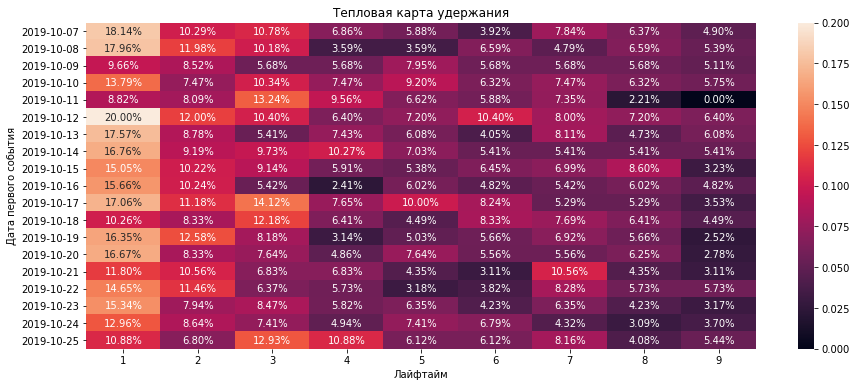

In [32]:
# строим хитмэп без нулевого лайфтайма

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.xlabel('Лайфтайм')
plt.ylabel('Дата первого события')
plt.show()

Удержание ожидаемо падает с каждым следующим днем пользователя в приложении, но при этом можно отметить как скачкообразно меняется поведение пользователей. Явной тенденции в разрезе по датам выделить не удалось, можно заключить, что поведение пользователей постоянно меняется.

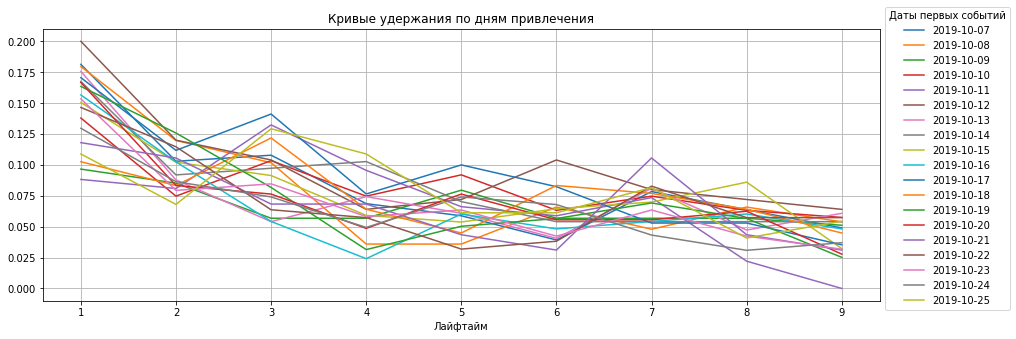

In [33]:
# строим кривые удержания

report = retention.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5),  # размер графика
    
)
plt.legend(bbox_to_anchor=(1, 1.1), title = 'Даты первых событий', fontsize=10)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по дням привлечения')  # название графика
plt.show()

В целом поведение пользоваетелей достаточно схоже - с каждым новым днем в приложении доля удержанных пользователей уменьшается. Наблюдаются единичные всплески, например на третий день лайфтайма.

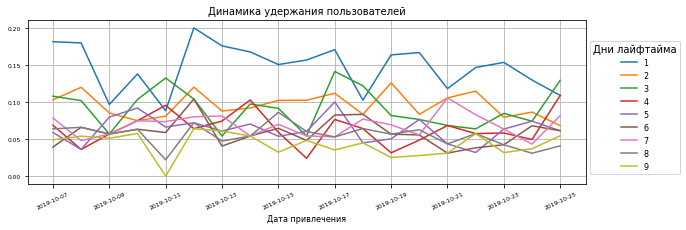

In [34]:
# строим графики изменений
report = retention.drop(columns=['cohort_size', 0])
report.plot(grid=True, figsize=(10, 3))
plt.xlabel('Дата привлечения', fontsize=8)
plt.title('Динамика удержания пользователей' , fontsize=10)
plt.xticks(rotation = 25, fontsize=6)
plt.yticks(fontsize=6)
plt.legend(bbox_to_anchor=(1, 0.9), title = 'Дни лайфтайма', fontsize=8)
plt.show()

Удержание пользователей на определённый лайфтайм менялось предсказуемым образом - самые высокие показатели отмечены в 1 день лайфтайма, самые низкие - в 9.

**Вывод 2.1:** для расчета retention rate были сформированы пользовательские профайлы и подготовлена функция для анализа удержания по заданному лайфтайму в интересующем нас разрезе. 
<br>
<br>
Анализ удержания по датам событий показал, что оно предсказуемо снижается с каждым следующим днем пользователя в приложении. Явной тенденции в разрезе по датам выделить не удалось, можно заключить, что поведение пользователей не зависит от даты начала использования приложения. 
<br>
В целом поведение пользоваетелей достаточно схоже - с каждым новым днем в приложении доля удержанных пользователей уменьшается. Наблюдаются единичные всплески, например на третий день лайфтайма.

##     2.2. Подсчет времени, проведенного пользователем в приложении, выделение пользовательских сессий

### 2.2.1 Выделение пользовательских сессий и подсчет времени, проведенного в приложении

Для дальнейшего анализа датасета нам необходимо выделить пользовательские сессии. Эта информация отсутствует в исходной базе для анализа, поэтому будем рассчитывать самостоятельно. Мы принимаем считать каждое действие пользователя после более чем получасового таймаута за начало новой сессии. Реализуем этот принцип в датасете:

In [35]:
data = data.sort_values(['user_id', 'event_time'])   # сортируем датасет по user_id и event_time

Выделяем пользовательские сессии, установив таймаут 30 минут. Это стандартное количество, обычно используемое при анализе сессий в мобильных приложениях:

In [36]:
# определяем таймаут 30 минут между группами
g = (data.groupby('user_id')['event_time'].diff() > pd.Timedelta('30Min')).cumsum()
# добавляем счетчик
data['session_id'] = data.groupby(['user_id', g], sort=False).ngroup() + 1
data['session_id'].max()

10368

Удалось выделить 10368 сессий. Посмотрим распределение их количества по датам:

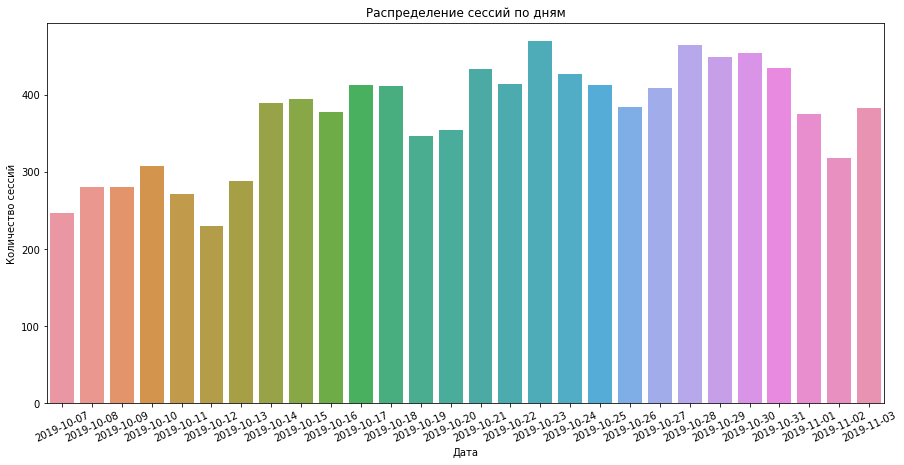

In [37]:
# группируем датасет по датам и считаем уникальные сессии

sessions_counts = data.groupby('event_date')['session_id'].nunique().reset_index()  
sessions_counts['event_date'] = sessions_counts['event_date'].dt.date 

# строим barplot, чтобы посмотреть на распределение

plt.figure(figsize = (15,7))
sns.barplot(x='event_date', y='session_id', data=sessions_counts)
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.ylabel('Количество сессий')
plt.xticks(rotation = 25)
#plt.grid()
plt.title('Распределение сессий по дням')
plt.show()

Сессии распределены достаточно равномерно, что позволяет сделать вывод о корректном их выделении. 

Посмотрим сколько в среднем сессий у одного пользователя:

In [38]:
sessions_count = data.groupby('user_id')['session_id'].nunique()
sessions_count.describe()

count    4293.000000
mean        2.415094
std         3.536466
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        99.000000
Name: session_id, dtype: float64

В среднем 2.4 сессии, а медианное количество - 1 на пользователя. 

Создадим новую переменную sessions и посчитаем в ней в рамках одной сессии минимальное и максимальное время действий:

In [39]:
sessions = (data
                .groupby(['user_id','session_id'])
                .agg(session_start=('event_time','first'), session_end=('event_time','last'))
                .reset_index()
           )
sessions

,user_id,session_id,session_start,session_end
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203
4,00157779-810c-4498-9e05-a1e9e3cedf93,5,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098
...,...,...,...,...
10363,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,10364,2019-11-02 01:16:48.947231,2019-11-02 01:16:48.947231
10364,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,10365,2019-11-02 18:01:27.094834,2019-11-02 18:17:41.386651
10365,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,10366,2019-11-02 19:25:53.794029,2019-11-02 19:30:50.471310
10366,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,10367,2019-11-03 14:32:55.956301,2019-11-03 14:48:44.263356


Добавим новое поле duration, в котором посчитаем продолжительность визита в рамках сессии. Посмотрим цифровое описание нового поля.

In [40]:
sessions['duration'] = sessions['session_end']-sessions['session_start']
sessions['duration'].describe()

count                        10368
mean     0 days 00:12:52.672627050
std      0 days 00:19:51.611332472
min                0 days 00:00:00
25%      0 days 00:00:21.137141500
50%      0 days 00:05:35.169711500
75%         0 days 00:17:25.391340
max         0 days 05:21:58.296302
Name: duration, dtype: object

In [41]:
# сгруппируем датасет с сессиями по user id и id сессий и посчитаем суммарную продолжительность.
#Посмотрим цифровое описание:

sessions.groupby(['user_id','session_id'], as_index=False).agg({'duration':'sum'})['duration'].describe()

count                        10368
mean     0 days 00:12:52.672627050
std      0 days 00:19:51.611332472
min                0 days 00:00:00
25%      0 days 00:00:21.137141500
50%      0 days 00:05:35.169711500
75%         0 days 00:17:25.391340
max         0 days 05:21:58.296302
Name: duration, dtype: object

Среднее время, проведенное в сессии, выделенной с помощью введения 30-минутных таймаутов - 12 минут. Медианное время в свою очередь заметно отличается - всего 5 минут. Это говорит о наличии большого количества выбросов, что показывает и максимальное время в рамках одной сессии - 5 часов 20 минут.

Т.к. в среднем на пользователя приходится 2,4 сессии, то с учетом средней продолжительности сессии в 12 минут это позволяет сделать вывод о том, что в среднем пользователь провел в нашем приложении чуть больше 30 минут. Медианный показатель заметно ниже - 5 с половиной минут и всего 1 сессия.

### 2.2.2. Аномалии и выбросы в продолжительности сессий

Теперь посмотрим на сессии с аномальной длиной - прежде всего те, у которых продолжительность 0, а также те, что ближе к максимальной продолжительности (5 часов 20 минут). Для этого создадим новый столбец с продолжительностью сессии в секундах.

In [42]:
sessions['delta_seconds'] = sessions['duration'].dt.seconds
sessions

,user_id,session_id,session_start,session_end,duration,delta_seconds
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,0 days 00:09:55.727258,595
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,0 days 00:08:27.385985,507
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,0 days 00:14:59.272096,899
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,0 days 00:12:38.171767,758
4,00157779-810c-4498-9e05-a1e9e3cedf93,5,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,0 days 00:25:20.787329,1520
...,...,...,...,...,...,...
10363,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,10364,2019-11-02 01:16:48.947231,2019-11-02 01:16:48.947231,0 days 00:00:00,0
10364,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,10365,2019-11-02 18:01:27.094834,2019-11-02 18:17:41.386651,0 days 00:16:14.291817,974
10365,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,10366,2019-11-02 19:25:53.794029,2019-11-02 19:30:50.471310,0 days 00:04:56.677281,296
10366,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,10367,2019-11-03 14:32:55.956301,2019-11-03 14:48:44.263356,0 days 00:15:48.307055,948


In [43]:
zero_sessions_id = sessions.query('delta_seconds == 0')['session_id'].unique()
zero_sessions_id

array([   10,    20,    27, ..., 10361, 10362, 10364])

In [44]:
(data
     .query('session_id in @zero_sessions_id')  # делаем срез по списку сессий с нулевой продолжительностью
     .groupby('session_id')['event_name']  # смотрим какие действия совершали пользователи в этих сессиях
     .count()
     .sort_values(ascending=False)
)

session_id
9810     8
3902     5
4140     3
4378     3
2279     3
        ..
3471     1
3467     1
3462     1
3461     1
10364    1
Name: event_name, Length: 2165, dtype: int64

In [45]:
# и посмотрим цифровое описание 

(data
     .query('session_id in @zero_sessions_id')  
     .groupby('session_id')['event_name']  
     .count()
     .sort_values(ascending=False).describe()
)

count    2165.000000
mean        1.041570
std         0.261747
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: event_name, dtype: float64

Изучив данные можно заключить, что в подавляющем большинстве нулевые сессии включали в себя только одно действие, что объясняет их нулевую продолжительность, которую мы определяли вычитая максимальное время сессии из минимального - в данном случае оно совпадает. Интерес представляют сессии, которые включали в себя несколько действий. Посмотрим на эти сессии внимательнее, а также определим какие именно единичные сессии часто совершают наши пользователи.

In [46]:
data.query('session_id == 9810') # смотрим нулевую сессию с 8 действиями

,event_time,event_name,user_id,channel,event_date,session_id
64075,2019-10-31 01:15:46.441270,photos_show,f29d922b-fc75-4eeb-a584-0c3532aa03d1,other,2019-10-31,9810
64076,2019-10-31 01:15:46.541507,photos_show,f29d922b-fc75-4eeb-a584-0c3532aa03d1,other,2019-10-31,9810
64077,2019-10-31 01:15:46.542302,photos_show,f29d922b-fc75-4eeb-a584-0c3532aa03d1,other,2019-10-31,9810
64078,2019-10-31 01:15:46.593045,photos_show,f29d922b-fc75-4eeb-a584-0c3532aa03d1,other,2019-10-31,9810
64079,2019-10-31 01:15:46.632959,photos_show,f29d922b-fc75-4eeb-a584-0c3532aa03d1,other,2019-10-31,9810
64080,2019-10-31 01:15:46.676125,photos_show,f29d922b-fc75-4eeb-a584-0c3532aa03d1,other,2019-10-31,9810
64081,2019-10-31 01:15:46.688195,photos_show,f29d922b-fc75-4eeb-a584-0c3532aa03d1,other,2019-10-31,9810
64082,2019-10-31 01:15:46.733027,photos_show,f29d922b-fc75-4eeb-a584-0c3532aa03d1,other,2019-10-31,9810


In [47]:
data.query('session_id == 3902')   # и нулевую сессию с пятью действиями

,event_time,event_name,user_id,channel,event_date,session_id
44895,2019-10-24 16:20:42.971488,photos_show,62a5375a-eb94-4ed2-90ef-3d79d8e0c359,other,2019-10-24,3902
44896,2019-10-24 16:20:43.087646,photos_show,62a5375a-eb94-4ed2-90ef-3d79d8e0c359,other,2019-10-24,3902
44897,2019-10-24 16:20:43.165635,photos_show,62a5375a-eb94-4ed2-90ef-3d79d8e0c359,other,2019-10-24,3902
44898,2019-10-24 16:20:43.383629,photos_show,62a5375a-eb94-4ed2-90ef-3d79d8e0c359,other,2019-10-24,3902
44899,2019-10-24 16:20:43.475608,photos_show,62a5375a-eb94-4ed2-90ef-3d79d8e0c359,other,2019-10-24,3902


In [48]:
data.query('session_id == 6214')  #  и с двумя

,event_time,event_name,user_id,channel,event_date,session_id
17948,2019-10-14 18:46:18.902931,photos_show,9c78948d-5850-4916-9d7f-341fec1b7737,other,2019-10-14,6214
17949,2019-10-14 18:46:19.070015,photos_show,9c78948d-5850-4916-9d7f-341fec1b7737,other,2019-10-14,6214


Все действия были действительно совершены в один момент, все из просмотренных включали в себя просмотр фотографий, все пришли не из яндекса или гугла. Можно сделать вывод что имел место переход по прямой ссылке. Какие были действия в нулевых сессиях?

In [49]:
(data
     .query('session_id in @zero_sessions_id')  # делаем срез по списку сессий с нулевой продолжительностью
     .groupby('event_name')['event_name']  # смотрим какие действия совершали пользователи в этих сессиях
     .count()
     .sort_values(ascending=False)
)

event_name
tips_show        925
photos_show      626
search           379
contacts_show    131
map              105
advert_open       47
favorites_add     31
tips_click        10
contacts_call      1
Name: event_name, dtype: int64

Теперь посмотрим какие были действия в сессиях с нулевой продолжительностью, но при этом более одного действия. 

In [50]:
result = (data
     .query('session_id in @zero_sessions_id')  # делаем срез по списку сессий с нулевой продолжительностью
     .groupby('session_id')['event_name']  # смотрим какие действия совершали пользователи в этих сессиях
     .count()
     .sort_values(ascending=False)
     ) > 1    # отбираем те id, где было более 1 действия 

display(result)
session_ids_with_true = result[result].index.tolist()  # записываем в новую переменную
session_ids_with_true

session_id
9810      True
3902      True
4140      True
4378      True
2279      True
         ...  
3471     False
3467     False
3462     False
3461     False
10364    False
Name: event_name, Length: 2165, dtype: bool

[9810,
 3902,
 4140,
 4378,
 2279,
 3887,
 7228,
 9811,
 3192,
 502,
 6115,
 9904,
 4104,
 7225,
 3145,
 8727,
 3110,
 4141,
 6208,
 6214,
 6218,
 6221,
 7799,
 10012,
 3675,
 6611,
 4798,
 4052,
 7127,
 6812,
 10062,
 5857,
 4379,
 4382,
 7005,
 1987,
 4286,
 1997,
 1998,
 854,
 3428,
 4262,
 4222,
 9617,
 8142,
 947,
 965,
 968,
 1847,
 9738,
 1846,
 3281,
 10049,
 1953,
 3831,
 65,
 7711,
 6438,
 7708,
 7701,
 6469,
 165,
 3886,
 7603,
 6445,
 6553,
 64,
 3746,
 3900,
 62,
 5107,
 7698,
 6456,
 10361,
 7706,
 8702,
 2553]

In [51]:
data_script

NameError: name 'data_script' is not defined

In [ ]:
(data
     .query('session_id in @session_ids_with_true') # отбираем сессии из новой переменной 
     .groupby('event_name')['event_name']
      .count()
     .sort_values(ascending=False)
)

В подавляющем большинстве случаев речь шла о просмотре фотографий, а также всплывающих автоматических рекомендациях. Таким образом можно заключить что нулевые сессии с несколькими действиями вероятнее всего осуществлялись по одномоментному переходу по ссылкам.

Посмотрим теперь на аномально длинные сессии. Средняя продолжительность 1 сессии - 12 минут, медианная - 5, 3 процентиль составляет 17 минут, а максимальная продолжительность одной сессии - 5 часов 20 минут. Посмотрим повнимательнее на сессии продолжительностью более 1 часа - это 3600 секунд.

In [ ]:
sessions.query('delta_seconds >3600')['session_id'].unique().shape

In [ ]:
long_sessions_id = sessions.query('delta_seconds >3600')['session_id'].unique()

In [ ]:
(data
     .query('session_id in @long_sessions_id')
     .groupby('event_name')['event_name']
     .count()
     .sort_values(ascending=False)
)

In [ ]:
(data
    .query('session_id in @long_sessions_id')
    .groupby('session_id')['event_name']
    .count()
    .sort_values(ascending=False)
)

In [ ]:
data.query('session_id == 6233').groupby('event_name')['event_name'].count().sort_values(ascending=False)

In [ ]:
data.query('session_id == 6234').groupby('event_name')['event_name'].count().sort_values(ascending=False)

Большое количество действий показывает, что продолжительные сессии скорее всего отмечались когда пользователи совершали много действий, активно что-то ища  - открывая объявления, смотря контакты и фотографии. Обращает на себя внимание 3 место по активностям целевого действия "просмотр контакта" - возможно стоит проверить конверсию длинных сессий.

**Вывод 2.2:** для анализа количества времени, проведенного пользователем в приложении, мы выделили пользовательские сессии путем установления 30-минутного таймаута. Удалось выделить 10368 сессий, равномерно распределенных по всему временному периоду. На одного пользователя в среднем приходится 2.4 сессии, а их медианное количество - 1 на пользователя. 
<br>
<br>
Среднее время, проведенное в сессии, выделенной с помощью введения 30-минутных таймаутов - 12 минут. Медианное время в свою очередь заметно отличается - всего 5 минут. Это говорит о наличии большого количества выбросов, что показывает и максимальное время в рамках одной сессии - 5 часов 20 минут.
<br>
<br>
Анализ аномально коротких и длинных сессий показал, что в нулевых по продожительности сессиях в подавляющем большинстве случаев речь шла либо о одномоментном действии (соответственно продолжительность не могла быть корректно подсчитана, т.к. она выделяется по разнице времени между несколькими событиями в рамках сессии) либо о просмотрах фотографий, а также всплывающих автоматических рекомендациях. Таким образом можно заключить что нулевые сессии с несколькими действиями вероятнее всего осуществлялись по одномоментному переходу по ссылкам.
<br>
<br>
Большое количество действий показывает, что продолжительные сессии (более 1 часа) скорее всего отмечались когда пользователи совершали много действий, активно что-то ища  - открывая объявления, смотря контакты и фотографии. Обращает на себя внимание 3 место по активностям целевого действия "просмотр контакта" - стоит проверить гипотезу о более высокой конверсии длинных сессий.

##     2.3. Определение частоты действий пользователя

Для определения частоты действий пользователя сгруппируем датасет по id пользователя и посчитаем общее количество всех действий. Посмотрим цифровое описание:

In [ ]:
data.groupby('user_id')['event_name'].count().describe()

В среднем на одного пользователя приходится 17 действий, а медиана - 9. Максимальное количество - 478. Однако эти данные включают в себя и просмотр рекомендаций, что является не пользовательским, а автоматическим действием. Посмотрим частоту действий без него:

In [ ]:
data_manual = data.query('event_name != "tips_show"') # исключаем действие tips_show
data_manual.groupby('user_id')['event_name'].count().describe()

В среднем на пользователя приходится уже 9.5 действий, а медиана составляет всего 5. Максимальное количество действий снизилось до 336.


Посмотрим разбивку частоты действий пользователей по периодам - в будни и выходные.

Для анализа разбивки частоты действий пользователя по дням недели применим функцию с методом isoweekday - понедельник 1 день недели, воскресенье 7:

In [ ]:
# Определение функции для получения дня недели
def get_weekday(date):
    return date.isoweekday()

# Применение функции к серии данных
data['week_day'] = data['event_date'].apply(get_weekday)
data_manual['week_day'] = data_manual['event_date'].apply(get_weekday)  # применяем функцию к датасету без рекомендаций
data.sample(5)

In [ ]:
# смотрим описание активности в будни
data.query('week_day != 6 & week_day != 7 ').groupby('user_id')['event_name'].count().describe()

In [ ]:
# смотрим описание активности в будни без tips_show

data_manual.query('week_day != 6 & week_day != 7 ').groupby('user_id')['event_name'].count().describe()

В среднем в будни 15.7 активностей на пользователя, медиана - 8. Без автоматических действий показатель снижается до в среднем 8 действий, медиана - 5. до 8.5

In [ ]:
# смотрим описание активности в выходные

data.query('week_day == 6 or week_day == 7 ').groupby('user_id')['event_name'].count().describe()

In [ ]:
# смотрим описание активности в выходные без tips_show

data_manual.query('week_day == 6 or week_day == 7 ').groupby('user_id')['event_name'].count().describe()

Среднее количество действий  - 13, медиана - 7.  Без автоматических действий показатель снижается до в среднем 7.5 действий, медиана - 4. до 8.5

Можно заключить, что пользователи совершают больше действий в будни. В выходные приложением пользуются меньше. Попробуем теперь посмотреть в разрезе по времени суток. Для этого напишем функцию, которая будет определять время дня по времени действия.

In [ ]:
def time_of_day_dict(dt=None, ts=None, tod_dict=None):
    '''
    Функция принимает объект datetime (dt) или timestamp (ts), и словарь tod_dict {час : наименование времени}
    Возвращает строку c временем суток. 
    При отсутствии аргументов - возвращает строку с текущим временем суток.

        Словарь по умолчанию: 
        {0: 'ночь', 1: 'ночь', 2: 'ночь', 3: 'ночь', 4: 'ночь', 5: 'ночь', 
         6: 'утро', 7: 'утро', 8: 'утро', 9: 'утро', 10: 'утро', 11: 'утро',
         12: 'день', 13: 'день', 14: 'день', 15: 'день', 16: 'день', 17: 'день',
         18: 'вечер', 19: 'вечер', 20: 'вечер',21: 'вечер', 22: 'вечер', 23: 'вечер' }

    Eсли час не отражен в словаре, возвращает None
    '''

    # определение словаря
    if tod_dict:
        pass
    else:
        tod_dict = {0: 'ночь', 1: 'ночь', 2: 'ночь', 3: 'ночь', 4: 'ночь', 5: 'ночь',  
                    6: 'утро', 7: 'утро', 8: 'утро', 9: 'утро', 10: 'утро', 11: 'утро',
                    12: 'день', 13: 'день', 14: 'день', 15: 'день', 16: 'день', 17: 'день',
                    18: 'вечер', 19: 'вечер', 20: 'вечер',21: 'вечер', 22: 'вечер', 23: 'вечер'}  # устанавливаем словарь

    # определяем оцениваемое время
    if dt:
        if isinstance(dt, datetime):
            dt = dt
        else:
            print('некорректный формат dt: %s \n требуется объект datetime.datetime' % (type(dt)))
            return None
    elif ts:
        if isinstance(ts, (int, float)):
            if ts > 0:
                dt = datetime.datetime.fromtimestamp(ts)
                print(dt.ctime())
            else:
                print('отрицательное значение ts недопустимо')
                return None
        else:
            print('некорректный формат ts: %s \n требуется значение int или float' % (type(ts)))
            return None
    else:
        dt = datetime.datetime.now()
    h = dt.hour

    # подбор
    if h in tod_dict:
        tod = tod_dict[h]
        return tod
    else:
        print('Значение времени отсутствует в словаре')
        return None

In [ ]:
# примененяем функцию time_of_day_dict к полю 'event_time'
data['time_of_day'] = data['event_time'].apply(lambda x: time_of_day_dict(dt=x))

# выводим результат
data.sample(10)

Добавим так же функцию для определения будни/выходные и тоже применим ее к датасету.

In [ ]:
def day_of_the_week(day):
    if day == 6 or day == 7:
        return 'выходные'
    else:
        return 'будни'

In [ ]:
data['workday_or_not'] = data['week_day'].apply(lambda x: day_of_the_week(day=x))
data.sample(10)

Для анализа создадим переменную event_daytime, куда сгруппируем данные по времени дня и посчитаем их долю

In [ ]:
event_daytime = data.pivot_table(
    index='time_of_day',
    values='event_time',
    aggfunc='count') .reset_index()

event_daytime.columns = ['время дня', 'количество событий']
event_daytime ['%'] = round(event_daytime ['количество событий']/event_daytime['количество событий'].sum()*100,2)

event_daytime = event_daytime.sort_values(by = "%", ascending = False)

In [ ]:
# строим график
plt.figure(figsize=(5, 3))
sns.barplot(data=event_daytime, x = 'время дня', y= 'количество событий')\
.set(title = 'Количество событий по времени дня', xlabel = 'Время дня', ylabel = "Количество событий" )

plt.show()

Добавим разбивку по дням недели

In [ ]:
event_quantity = data.pivot_table(
    index='time_of_day',
    columns='workday_or_not',
    values='event_time',
    aggfunc='count'   
)

# посчитаем доли  

event_quantity['будни_%'] = round(event_quantity['будни']/(event_quantity['будни'].sum() + \
                                                           event_quantity['выходные'].sum())*100, 2)
event_quantity['выходные_%'] = round(event_quantity['выходные']/(event_quantity['будни'].sum() + \
                                                            event_quantity['выходные'].sum())*100, 2)
event_quantity

In [ ]:
# строим хитмэп

plt.figure(figsize=(8, 3))  # задаём размер графика
sns.heatmap(
    event_quantity.drop(columns=['будни','выходные']),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
)
plt.title('Тепловая карта частоты действий по дню недели и времени дня, % ')  # название графика
plt.ylabel('Время дня')
plt.xlabel('День недели')
plt.show()

**Вывод 2.3:** частота действий на пользователя в среднем оставляет 17 действий , медиана - 9. Максимальное количество совершенных на пользователя действий - 478, минимально - 1. При исключении из общего массива действий при подсчете show_tips, т.к. оно является автоматическим, в среднем на пользователя приходится уже 9.5 действий, а медиана составляет всего 5. Максимальное количество действий снизилось до 336.
<br>
<br>
В разбивке частоты действий пользователей по периодам будни/выходные выявлено, что в среднем в будни 15.7 активностей на пользователя, медиана - 8. Без автоматических действий показатель снижается до в среднем 8 действий, медиана - 5. до 8.5. 
<br>В выходные среднее количество действий  - 13, медиана - 7.  Без автоматических действий показатель снижается до в среднем 7.5 действий, медиана - 4. до 8.5
<br>
Можно заключить, что пользователи совершают больше действий в будни. В выходные приложением пользуются меньше. 
<br>
<br>
В разбивке частоты действий пользователей по времени дня выявлено подавляющее преимущество дневных посещений, на втором месте вечер, потом идут утро и меньше всего приложение используют ночью.
<br>
<br>
Посмотрев сочетание дня недели и времени дня можно заключить, что самые популярное время у пользователей нашего приложения - будни день и будни вечер. Наименее популярно приложение в ночное время - как в выходные, так и в будни.

## 2.4. Расчет конверсии в целевое действие (просмотр контакта)

Для расчета конверсии в целевое действие (просмотр контакта) нам нужно разделить уникальных пользователей, совершивших целевое действие, на общее количество уникальных пользователей

In [ ]:
conversion_rate = round(data[data['event_name'] == 'contacts_show']['user_id'].nunique()\
                        /data['user_id'].nunique()*100,2)
conversion_rate

Посмотрим как влияют автоматические рекомендации на расчет уровня корреляции - посчитаем корреляцию на датасете без них.

In [ ]:
conversion_rate_manual = round(data_manual[data_manual['event_name'] == 'contacts_show']['user_id'].nunique()\
                        /data_manual['user_id'].nunique()*100,2)
conversion_rate_manual

**Вывод 2.4:** Большинство пользователей не совершают целевого действия. До события "просмотр контакта", которое мы определили как целовое, доходит примерно 23% всех пользователей. Если рассматривать датасет только с пользовательскими действиями (без автоматических рекомендаций), то конверсия возрастает до 27.36%

Проведенный исследовательский анализ позволил заключить следующее о поведении пользователя:
<br>
<br>
- Индекс удержания пользователей снижается с каждым их следующим днем  в приложении. Взаимосвязи между поведением пользователей и датой начала использования приложения не выявлено. 
<br>
- На одного пользователя в среднем приходится 2.4 сессии, а их медианное количество - 1 на пользователя. В среднем за сессию пользователи проводят в приложении 12 минут
<br>
- Частота действий на пользователя в среднем оставляет 17 действий , медиана - 9. Пользователи совершают больше действий в будни. В выходные приложением пользуются меньше.
<br>
- В разбивке частоты действий пользователей по времени дня выявлено подавляющее преимущество дневных посещений, на втором месте вечер, потом идут утро и меньше всего приложение используют ночью.
<br>
- Посмотрев сочетание дня недели и времени дня можно заключить, что самые популярное время у пользователей нашего приложения - будни день и будни вечер. Наименее популярно приложение в ночное время - как в выходные, так и в будни.
<br>
-  Большинство пользователей не совершают целевого действия. До события "просмотр контакта", которое мы определили как целовое, доходит примерно 23% всех пользователей. 

# 3. Сегментация пользователей на основе проведенного исследовательского анализа

## 3.1. Возможные варианты сегментации пользователей, возникшие по итогам исследовательского анализа данных

По итогам исследовательского анализа данных представляется возможным сегментировать пользователей по нескольким вариантам. Рассмотрим их и выберем оптимальный для поставленных перед нами целью - выделение пользователей на основе их действий

1. Сегментирование по неделям - возможно провести анализ по 4 неделям, рассмотрев как меняется конверсия и удержание клиентов. Однако этот вариант не представляется перспективным с точки зрения бизнес-логики, т.к. это не даст нам особых инсайтов с точки зрения стратегии. Речь идет о ретроспективном анализе  - "как было". Отбрасываем этот вариант как неперспективный.

2. Сегментирование по действиям пользователей - можно выделить самые популярные сценарии (последовательность действий) пользователей в приложении, чтобы в дальнейшем попытаться выявить какой из них обладает лучшими бизнес-показателями. Это позволит разработать рекомендации о потенциальной дороботке приложения и его юзабилити.

3. Сегментирование по времени активности в приложении - во время исследовательского анализа мы выделили основные пользовательские сессии и рассмотрели их специфику в разрезе будни/выходные, а также в разное время дня. Эта сегментация позволяет выделить сильно отличающиеся друг от друга группы пользователей и сравнить конверсию в целевое действие и удержание пользователей.

**Вывод 3.1.:** сформулировано 3 возможных варианта сегментации пользователей, из них 2 и 3 вариант представляются перспективными.

## 3.2. Использованный способ сегментации пользователей: общие принципы, обоснование выбора, детальное описание сегментов

Для сегментирования пользователей используем третий рассматриваемый способ, распределив их по времени активности в приложении. Это позволит нам сформулировать бизнес-рекомендации и выделить особенности поведения пользователей в зависимости от времени сессии.

Для этого напишем функцию segment_data, которая будет соединять данные о времени дня и дне недели, образовывая сегменты для анализа.

In [ ]:
def segment_data(row):
    workday = row['workday_or_not']
    time_of_day = row['time_of_day']
    
    if workday == 'будни' and time_of_day == 'утро':
        return 'будни, утро'
    elif workday == 'будни' and time_of_day == 'день':
        return 'будни, день'
    elif workday == 'будни' and time_of_day == 'вечер':
        return 'будни, вечер'
    elif workday == 'будни' and time_of_day == 'ночь':
        return 'будни, ночь'
    elif workday == 'выходные' and time_of_day == 'утро':
        return 'выходные, утро'
    elif workday == 'выходные' and time_of_day == 'день':
        return 'выходные, день'
    elif workday == 'выходные' and time_of_day == 'вечер':
        return 'выходные, вечер'
    elif workday == 'выходные' and time_of_day == 'ночь':
        return 'выходные, ночь'
    else:
        return 'недопустимые значения'

In [ ]:
data['segment'] = data.apply(segment_data, axis=1) # применяем функцию

In [ ]:
data.sample(10)

Посмотрим как распределились пользователи по этим сегментам:

In [ ]:
segmentation = (data
                    .pivot_table(index='segment', values = 'event_name', aggfunc= 'count')
                    .reset_index()
                    .sort_values(by = 'event_name', ascending = False)
               )

In [ ]:
segmentation['%'] = round(segmentation['event_name']/segmentation['event_name'].sum()*100, 2)
segmentation

Мы видим что 3 сегмента выпадают по своей численности, являясь слишком мелкими. Попробуем их укрупнить - перепишем функцию, чтобы ночь добавлялась к вечеру, а также укрупним сегмент выходных - добавим утро к дню 

In [ ]:
def segment_data_big(row):
    workday = row['workday_or_not']
    time_of_day = row['time_of_day']
    
    if workday == 'будни' and time_of_day == 'утро':
        return 'будни, утро'
    elif workday == 'будни' and time_of_day == 'день':
        return 'будни, день'
    elif workday == 'будни' and (time_of_day == 'вечер' or time_of_day == 'ночь'):
        return 'будни, вечер и ночь'
    #elif workday == 'будни' and time_of_day == 'ночь':
    #    return 'будни, ночь'
    elif workday == 'выходные' and (time_of_day == 'утро' or time_of_day == 'день'):
        return 'выходные, утро и день'
#    elif workday == 'выходные' and time_of_day == 'день':
 #       return 'выходные, день'
    elif workday == 'выходные' and (time_of_day == 'вечер' or time_of_day == 'ночь'):
        return 'выходные, вечер и ночь'

    else:
        return 'недопустимые значения'

In [ ]:
data['segment'] = data.apply(segment_data_big, axis=1)

In [ ]:
segmentation = (data
                    .pivot_table(index='segment', values = 'event_name', aggfunc= 'count')
                    .reset_index()
                    .sort_values(by = 'event_name', ascending = False)
               )

In [ ]:
segmentation['%'] = round(segmentation['event_name']/segmentation['event_name'].sum()*100, 2)
segmentation

Теперь наша задача - перенести сегментацию по сессиям в пользовательские профайлы наших клиентов. Посмотрим у какого количества пользователей сессий попадают в более чем 1 сегмент

In [ ]:
segment_counts = data.groupby('user_id')['segment'].nunique()
filtered_users = segment_counts[segment_counts > 1].index
filtered_users.nunique()

In [ ]:
filtered_data = data[data['user_id'].isin(filtered_users)]

In [ ]:
(filtered_data
     .pivot_table(index = 'user_id', values = 'segment', aggfunc = 'nunique')
     .reset_index()
     .sort_values(by = 'segment', ascending = False)
     ['segment'].describe()
)


Медианное количество сегментов на одного пользователя - 2, это много. Еще раз укрупним сегментацию, объединив в будни утро и день, т.к. это самая частая комбинация пересекающихся сессий, кроме того мы уже применили такой подход к выходным. Посмотрим сколько осталось пересечений

Еще раз укрупним сегментацию, объединив в будни утро и день, т.к. это самая частая комбинация пересекающихся сессий, кроме того мы уже применили такой подход к выходным. Посмотрим сколько осталось пересечений

In [ ]:
def segment_data_biggest(row):
    workday = row['workday_or_not']
    time_of_day = row['time_of_day']
    
    if workday == 'будни' and (time_of_day == 'утро' or time_of_day == 'день'):
        return 'будни, утро и день'
    elif workday == 'будни' and (time_of_day == 'вечер' or time_of_day == 'ночь'):
        return 'будни, вечер и ночь'
    #elif workday == 'будни' and time_of_day == 'ночь':
    #    return 'будни, ночь'
    elif workday == 'выходные' and (time_of_day == 'утро' or time_of_day == 'день'):
        return 'выходные, утро и день'
#    elif workday == 'выходные' and time_of_day == 'день':
 #       return 'выходные, день'
    elif workday == 'выходные' and (time_of_day == 'вечер' or time_of_day == 'ночь'):
        return 'выходные, вечер и ночь'

    else:
        return 'недопустимые значения'

In [ ]:
data['segment'] = data.apply(segment_data_biggest, axis=1)

In [ ]:
segmentation = (data
                    .pivot_table(index='segment', values = 'event_name', aggfunc= 'count')
                    .reset_index()
                    .sort_values(by = 'event_name', ascending = False)
               )

In [ ]:
segmentation['%'] = round(segmentation['event_name']/segmentation['event_name'].sum()*100, 2)
segmentation

In [ ]:
# строим график
plt.figure(figsize=(5, 3))
sns.barplot(data=segmentation, y = 'event_name', x= 'segment')\
.set(title = 'Количество событий по сегментам', xlabel = 'Сегмент', ylabel = "Количество событий" )
plt.xticks(rotation = 15)
plt.show()

Подготовим переменную, в которую сгруппируем пользователей по id и сегменту. Для пользователей, у которых более чем один временной сегмент сессий мы применим допущение и назначим первый из них. 

In [ ]:
users_segments = (
        data.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg(
            {
                'segment': 'first',
            }
        )
)

Перенесем эти данные в наши профайлы, объединив по user_id

In [ ]:
profiles = profiles.merge(users_segments[['segment']], on='user_id', how='left')

In [ ]:
profiles['segment'].isna().sum()  # удостоверимся что никого не пропустили

In [ ]:
profiles.pivot_table(index = 'segment', values = 'user_id', aggfunc = 'nunique')

**Вывод 3.2:** пользователи приложения были сегментированы с помощью распределения их по времени активности в приложении. Проанализировав распределение сегменты были укрупнены, в итоге было выделено 4 основных сегмента - будни, утро и день; будни вечер и ночь; выходные утро и день; выходные вечер и ночь. Доля самого крупного сегмента составила 46%, самого мелкого - 13%.
<br>
Пользователей, у которых было несколько сессий в разные временные периоды мы отнесли к временному сегменту первой из таких сессий.

## 3.3. Расчет индекса удержания пользователей в разрезе выбранной сегментации   

Для расчета удержания пользователей в разрезе выбранной сегментации запустим уже подготовленную ранее функцию,задав ей в качестве параметра dimensions - 'segment'

In [ ]:
retention_raw, retention = get_retention(
    profiles, data, datetime(2019, 11, 3).date(), 10, dimensions = 'segment'
)

retention

Посмотрим на визуализацию:

In [ ]:
# строим хитмэп без нулевого лайфтайма

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания в разрезе по сегментам')  # название графика
plt.xlabel('Лайфтайм')
plt.ylabel('Сегмент')
plt.show()


In [ ]:
# строим кривые удержания

report = retention.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по сегментам')  # название графика
plt.legend(bbox_to_anchor=(1, 0.9), title = 'Время сессии', fontsize=10)
plt.show()

In [ ]:
# строим графики изменений
report = retention.drop(columns=['cohort_size', 0])
report.plot(grid=True, figsize=(10, 3))
plt.xlabel('Время сессии', fontsize=8)
plt.title('Динамика удержания пользователей по времени сессии и лайфтайму' , fontsize=10)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.legend(bbox_to_anchor=(1, 0.9), title = 'Лайфтайм', fontsize=8)
plt.show()

**Вывод 3.3:** анализ удержания позволил выявить, что выше всего удержание пользователей в период вечера и ночи, особенно в выходные. Самый высокий показатель у 1 дня лайфайма выходные, вечер и ночь. 

## 3.4. Расчет конверсии в целевое действие (просмотр контакта) в разрезе выбранной сегментации

Для подсчета конверсии по выделенным сегментам запустим цикл, который будет перебирать значения в списке выделенных сегментов и рассчитывать конверсию для каждого из них.

In [ ]:
segments_name = ['будни, утро и день', 'будни, вечер и ночь', 'выходные, утро и день','выходные, вечер и ночь']

In [ ]:
for i in segments_name:  
    
    i_conversion_rate = round(data
        .query('segment == @i')[data['event_name'] == 'contacts_show']['user_id']
        .nunique()/data.query('segment == @i')['user_id'].nunique()*100,2
      )
    print ('Конверсия в целевое действие пользователей в период', i, 'равна:', i_conversion_rate)

Повторим запуска цикла для очищенного датасета (без автоматически действий show_tips). Применим к нему функцию сегментирования.

In [ ]:
data_manual['time_of_day'] = data_manual['event_time'].apply(lambda x: time_of_day_dict(dt=x))
data_manual['workday_or_not'] = data_manual['week_day'].apply(lambda x: day_of_the_week(day=x))
data_manual['segment'] = data_manual.apply(segment_data_biggest, axis=1)

In [ ]:
for i in segments_name:  
    
    i_conversion_rate = round(data_manual
        .query('segment == @i')[data_manual['event_name'] == 'contacts_show']['user_id']
        .nunique()/data_manual.query('segment == @i')['user_id'].nunique()*100,2
      )
    print ('Конверсия в целевое действие пользователей в период', i, 'равна:', i_conversion_rate)

**Вывод 3.4.:** самая высокая конверсия в целевое действие отмечается в будни, утро и день - 22,5% (27,8% на очищенном от рекомендаций датасете), достаточно близко к ней и конверсия выходные, утро и день - 22.2%( 26.5% без рекомендаций. Ниже всего конверсия вечерами, особенно в выходные - 15.87%(19.72%). Скорее всего это связано с тем, что целевое действие "просмотр контактов" пользователи обычно выполняют чтобы непосредственно связаться с продавцом, что не является возможным вечером и ночью.

# 4. Формулировка и проверка статистических гипотез


## 4.1. Гипотеза 1: конверсия в просмотры контактов разная у пользователей, установивших приложение через ссылку из yandex и через google 

В рамках исследования проверим также статистические гипотезы. Первая рассматриваемая гипотеза - конверсия в просмотры контактов отличается у пользователей, установивших приложение через ссылку из yandex и через google.
<br>
<br>
Для проверки гипотезы используем z-test. Сформулируем нулевую и альтернативную гипотезы.
<br>H0 - конверсия в просмотры контактов у пользователей из yandex и через google равна
<br>H1 - конверсия в просмотры контактов у пользователей из yandex и через google отличается


In [ ]:
alpha = .05 # задаем критический уровень статистической значимости

# считаем количество пользователей, совершивших событие:
successes = [data.query('event_name=="contacts_show" & channel == "yandex"')['user_id'].nunique(), \
    data.query('event_name=="contacts_show" & channel == "google"')['user_id'].nunique()]
# и сколько всего пользователей в группе:
trials = [data.query('channel == "yandex"')['user_id'].nunique(), \
          data.query('channel == "google"')['user_id'].nunique()]

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  
p_value = (1 - distr.cdf(abs(z_value))) * 2
    # поменяли список событий на вариант без обучения
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: конверсия в просмотры контактов у пользователей из yandex и через google отличается')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсию в просмотры контактов разной')
    
print(f'Конверсия в просмотры контактов у пользователей из yandex: {p1:.2%}')
print(f'Конверсия в просмотры контактов у пользователей из  google: {p2:.2%}')        


**Вывод 4.1:**: с помощью z-test мы приняли нулевую гипотезу - конверсия в просмотры контактов у пользователей из yandex и через google одинаковая. Посмотрев детальные значения мы еще раз в этом убедились - конверсия пользователей, пришедших по ссылке из yandex 24.72%, а из google - 24,36%

## 4.2. Гипотеза 2:  конверсия в просмотры контактов разная у пользователей в будни и выходные

Вторая рассматриваемая гипотеза была сформулирована нами во время анализа пользовательских сессий:  конверсия в просмотры контактов отличается у пользователей из длинных сессий (более 1 часа) и сессий обычной продолжительности.
<br>
<br>
Для проверки гипотезы используем z-test. Сформулируем нулевую и альтернативную гипотезы.
<br>H0 - конверсия в просмотры контактов у пользователей в длинные (более 1 часа) сессии и сессии обычной продолжительности равная
<br>H1 - конверсия в просмотры контактов у пользователей в длинные (более 1 часа) сессии и сессии обычной продолжительности отличается
<br>
Снова используем z-test

In [ ]:
alpha = .05 # задаем критический уровень статистической значимости

# считаем количество пользователей, совершивших событие - целевое действие, при этом их id либо 
# находятся в списке long_sessions_id c  id сессий длиннее часа, либо во втором случае эти сессии исключены из анализа

successes = [data.query('event_name=="contacts_show" & session_id in @long_sessions_id')['user_id'].nunique(), \
    data.query('event_name=="contacts_show"& session_id not in @long_sessions_id')['user_id'].nunique()]
# и сколько всего пользователей в группе:
trials = [data.query('session_id in @long_sessions_id')['user_id'].nunique(), \
          data.query('session_id not in @long_sessions_id')['user_id'].nunique()]

# пропорция успехов в первой группе - длинные сессии:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе - без длинных сессий:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  
p_value = (1 - distr.cdf(abs(z_value))) * 2
    # поменяли список событий на вариант без обучения
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: конверсия в просмотры контактов у пользователей в длинных и обычных сессиях отличается')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсию в просмотры контактов разной')
    
print(f'Конверсия в просмотры контактов у пользователей в длинных сессиях: {p1:.2%}')
print(f'Конверсия в просмотры контактов у пользователей в обычных сессиях: {p2:.2%}')        


**Вывод 4.2**: с помощью z-test мы отвергнули нулевую гипотезу и приняли альтернативную -  конверсия в просмотры контактов у пользователей в длинные и обычные сессии отличается. Посмотрев детальные значения мы еще раз в этом убедились - конверсия пользователей в длинных сессиях 35,74%, а в обычных - 22,29%

# 5. Выводы и рекомендации

## 5.1 Выводы

Данное исследование было проведено для проекта сегментации пользователей мобильного приложения "Ненужные вещи". 
<br>
<br>
Основной целью исследования являлось **выделение групп пользователей на основе их поведения в мобильном приложении "Ненужные вещи", анализ их индекса удержания и конверсии.** 
<br>
<br>
Данными для анализа являлась информация о действиях пользователей приложения в период с 7 октября 2019 года по 3 ноября 2019 года

В процессе исследования был реализованы следующие шаги: 

**Первичный анализ и обработка данных:**

- загружены и объединены базы для анализа
- поля и названия приведены к нужному типу данных
- выделены дополнительные поля
- объединены неявные дубликаты
- укрупнены категории действий пользователя

**Исследовательский анализ:** 
- анализ удержания по датам событий показал, что оно  снижается с каждым следующим днем пользователя в приложении. Явной тенденции в разрезе по датам выделить не удалось, что позволило заключить, что поведение пользователей не зависит от даты начала использования приложения
- были выделены пользовательские сессии путем установления 30-минутного таймаута. Удалось выделить 10368 сессий, равномерно распределенных по всему временному периоду. На одного пользователя в среднем приходится 2.4 сессии, а их медианное количество - 1 на пользователя. 
- среднее время, проведенное в сессии, выделенной с помощью введения 30-минутных таймаутов - 12 минут. Медианное время в свою очередь заметно отличается - всего 5 минут. Это говорит о наличии большого количества выбросов, что показывает и максимальное время в рамках одной сессии - 5 часов 20 минут.
- анализ аномально коротких и длинных сессий показал, что нулевые сессии с несколькими действиями вероятнее всего осуществлялись по одномоментному переходу по ссылкам.
- большое количество действий показывает, что продолжительные сессии (более 1 часа) скорее всего отмечались когда пользователи совершали много действий, активно что-то ища  - открывая объявления, смотря контакты и фотографии. Отмечено большое количество целевого действия "просмотр контакта" - выдвинута гипотеза о более высокой конверсии длинных сессий
- частота действий на пользователя в среднем составила 17 действий , медиана - 9. При исключении из общего массива действий при подсчете show_tips, в среднем на пользователя приходится уже 9.5 действий, а медиана составила всего 5
- в разбивке частоты действий пользователей по периодам будни/выходные заключено, что пользователи совершают больше действий в будни. В выходные приложением пользуются меньше.
- в разбивке частоты действий пользователей по времени дня выявлено подавляющее преимущество дневных посещений, на втором месте вечер, потом идут утро и меньше всего приложение используют ночью.
- самое популярное время у пользователей приложения - день в будни и вечер в будни. Наименее популярно приложение в ночное время - как в выходные, так и в будни.
- подсчет конверсии в целевое действие "просмотр контакта" показал, что большинство пользователей не совершают целевого действия. До него  доходит примерно 23% всех пользователей. Если рассматривать датасет только с пользовательскими действиями (без автоматических рекомендаций), то конверсия возрастает до 27.36%

**Сегментация пользователей**
- было сформулировано 3 возможных варианта сегментации пользователей, из них был отобран наиболее перспективный
- пользователи приложения были сегментированы с помощью распределения их по времени активности в приложении. Выделено 4 основных сегмента - будни, утро и день; будни вечер и ночь; выходные утро и день; выходные вечер и ночь. Доля самого крупного сегмента составила 46%, самого мелкого - 13%
- пользователей, у которых было несколько сессий в разные временные периоды мы отнесли к временному сегменту первой из таких сессий.
- анализ удержания показал, что выше всего удержание пользователей в период вечера и ночи, особенно в выходные. Самый высокий показатель у 1 дня лайфайма сегмента "выходные, вечер и ночь". 
- самая высокая конверсия в целевое действие отмечается в будни, утро и день - 22,5% (27,8% на очищенном от рекомендаций датасете), достаточно близко к ней и конверсия выходные, утро и день - 22.2%( 26.5% без рекомендаций. Ниже всего конверсия вечерами, особенно в выходные - 15.87%(19.72%). Скорее всего это связано с тем, что целевое действие "просмотр контактов" пользователи обычно выполняют чтобы непосредственно связаться с продавцом, что не является возможным вечером и ночью.

**Проверка статистических гипотез**
- было проведено два z-test'a для проверки гипотез о различии конверсий у клиентов, пришедших по ссылке из yandex или google и у пользователей с длинными (более часа) сессиями и обычными
- была принята первая нулевая гипотеза - конверсия в просмотры контактов у пользователей из yandex и через google одинаковая (из yandex 24.72%, а из google - 24,36%)
- была отвергнута вторая нулевая гипотеза и принята альтернативная - конверсия в просмотры контактов у пользователей в длинные и обычные сессии отличается (конверсия пользователей в длинных сессиях 35,74%, а в обычных - 22,29%)

## 5.2 Рекомендации:

В результате проведенного исследования можно сформулировать несколько бизнес-рекомендаций:
1. Необходимо проанализировать пользовательские сценарии и алгоритм поиска в приложении  "Ненужные вещи". Подтвержденная статистическая гипотеза показала, что конверсия у длинных сессий выше, чем у обычных - это серьезный "красный флаг". Пользователям требуется больше среднего времени для того чтобы чаще совершать целевое действие "просмотр контакта".
<br>
<br>
2. Рекомендуем привлекать больше пользователей в выходные: использовать push-уведомления, маркетинговые средства привлечения клиентов (акции, рассылки, напоминания). Конверсия днем в выходные практически не уступает лидеру (день в будни), но при этом количество пользователей в приложении ощутимо меньше. Привлечение пользователей в выходные таким образом позволит нам увеличить конверсию в целевое действие в среднем по всем пользователям.